Group 9- Nikhil Rawat, Swasti Jain, Aditya subramanian, Pranav Sawant

In [21]:
# Importing the pandas library 
import pandas as pd

# Loading the dataset into a pandas DataFrame
df = pd.read_csv('/Users/nick/Downloads/WorldSustainabilityDataset.csv')

# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Filling missing values in numeric columns with their respective column means
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Saving the modified DataFrame to a new CSV file
df.to_csv('/Users/nick/Downloads/WorldSustainabilityDataset_Filled.csv', index=False)

# Printing a message 
print("The dataset has been updated and saved at /Users/nick/Downloads/WorldSustainabilityDataset_Filled.csv")

The dataset has been updated and saved at /Users/nick/Downloads/WorldSustainabilityDataset_Filled.csv


Question- 1

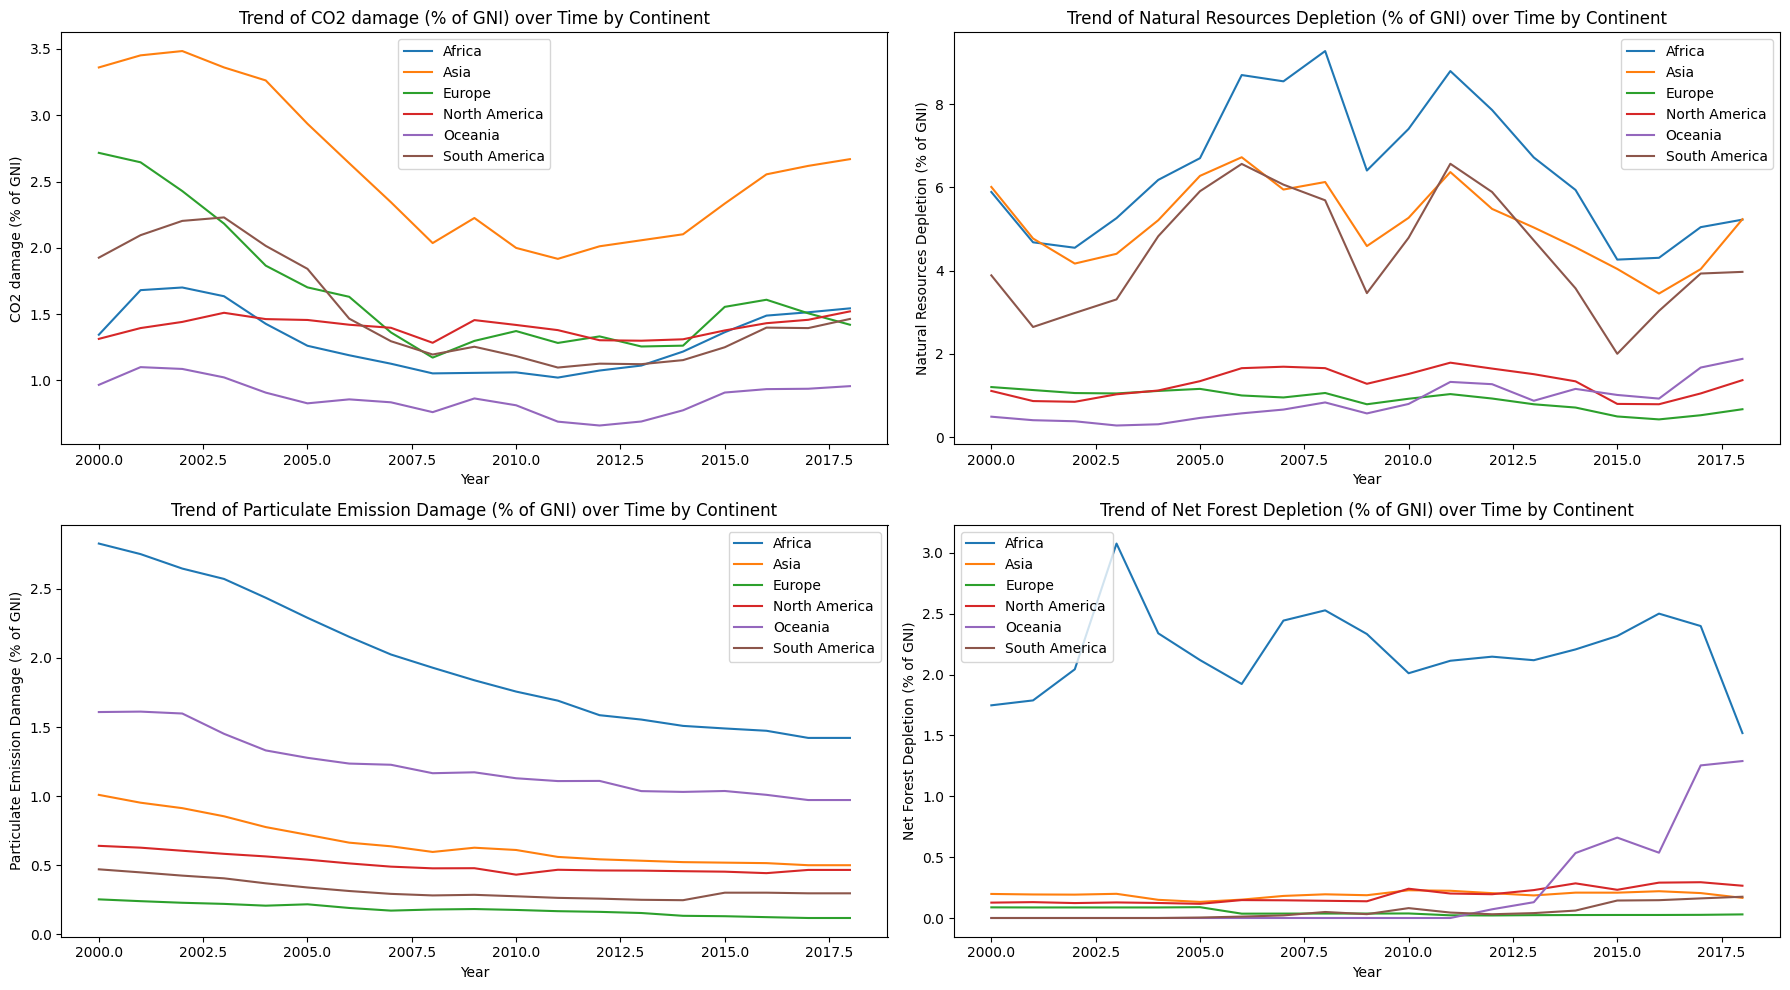

In [22]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the pre-processed dataset 
df_filtered = pd.read_csv('/Users/nick/Downloads/WorldSustainabilityDataset_Filled.csv')

variables = {
    'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS': 'CO2 damage (% of GNI)',
    'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS': 'Natural Resources Depletion (% of GNI)',
    'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS': 'Particulate Emission Damage (% of GNI)',
    'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS': 'Net Forest Depletion (% of GNI)'
}

# Grouping the dataset by 'Continent' and 'Year'
grouped_data = df_filtered.groupby(['Continent', 'Year'])[list(variables.keys())].mean().reset_index()

# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Looping through each variable to plot their trends
for i, (var_key, var_title) in enumerate(variables.items()):
    ax = axes[i//2, i%2]  # The position of the subplot
    # Plotting the trend for each continent within the variable
    for continent in grouped_data['Continent'].unique():
        continent_data = grouped_data[grouped_data['Continent'] == continent]
        ax.plot(continent_data['Year'], continent_data[var_key], label=continent)
        
    # Setting the title, x-label, y-label and legend
    ax.set_title(f'Trend of {var_title} over Time by Continent')
    ax.set_xlabel('Year')
    ax.set_ylabel(var_title)
    ax.legend() 

plt.tight_layout()
# Display
plt.show()


Question- 2

/var/folders/rk/bd25l14n4p7br8rxr3c4rxgc0000gn/T/ipykernel_98642/785880815.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


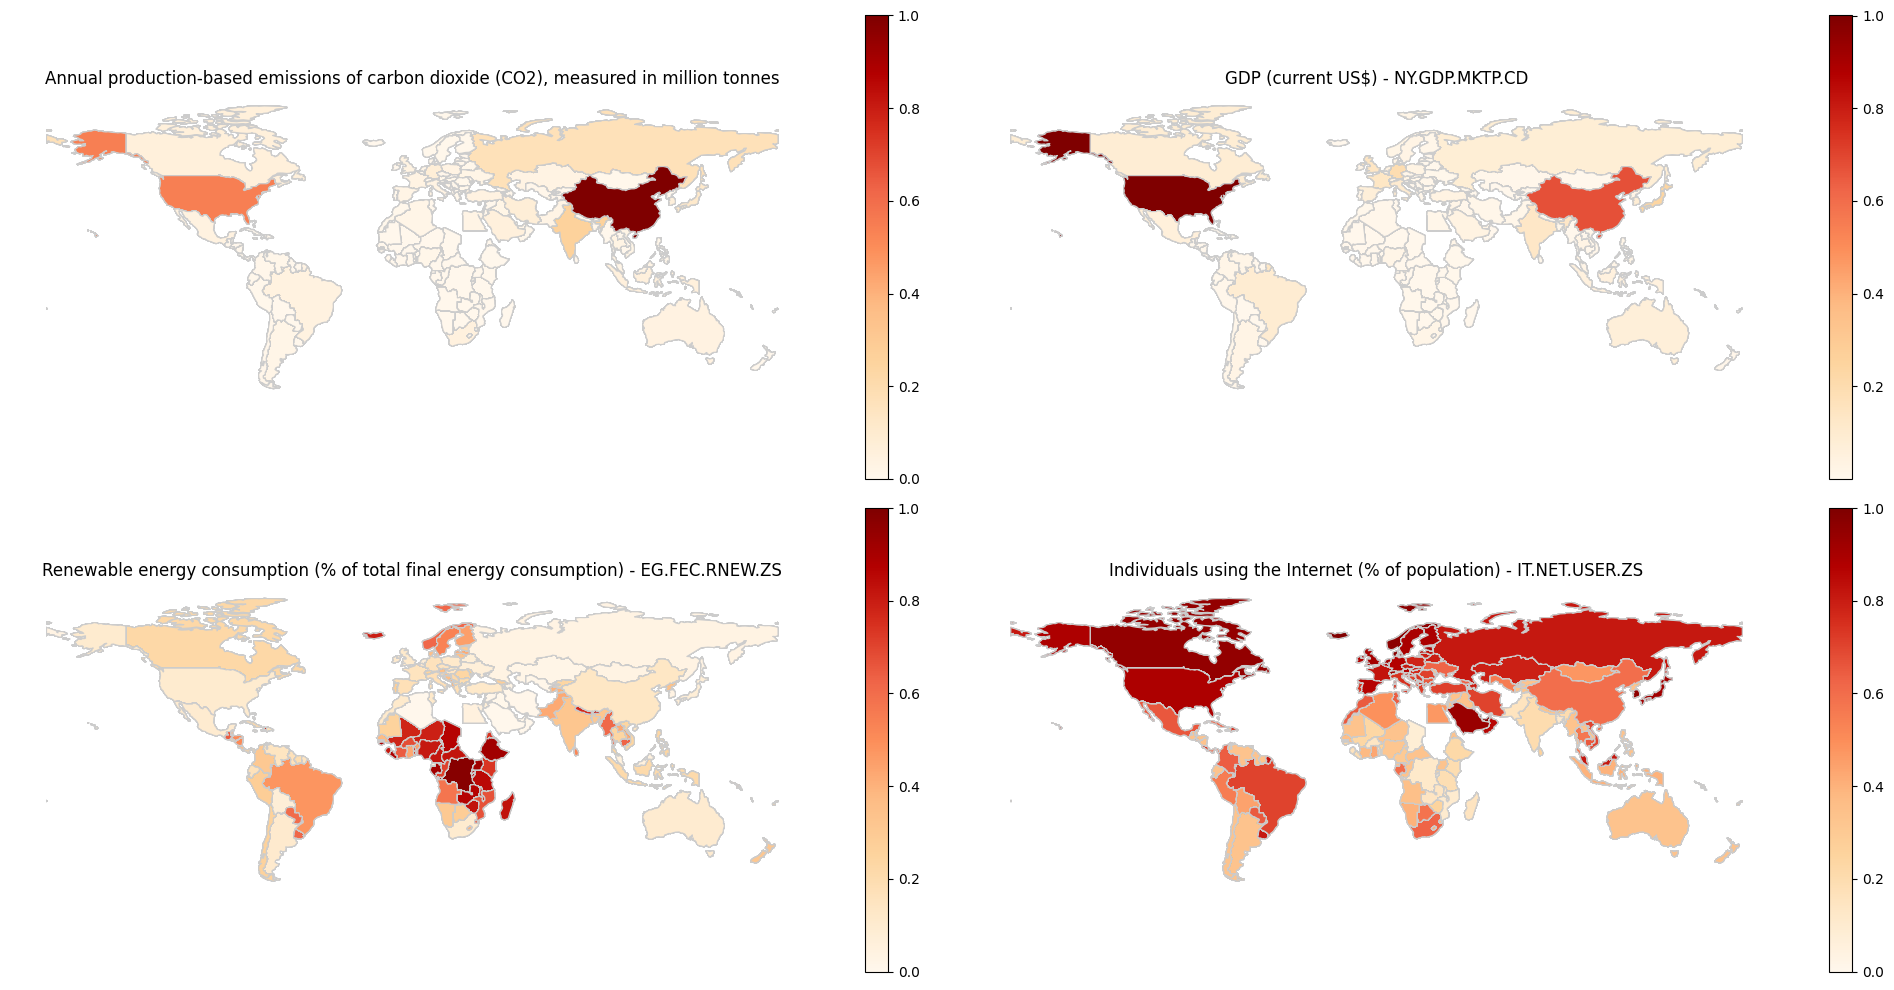

In [23]:
# Importing necessary libraries for geospatial analysis
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Loading the pre-processed dataset
df_filtered = pd.read_csv('/Users/nick/Downloads/WorldSustainabilityDataset_Filled.csv')

# Geographical data of countries 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# For data normalization
from sklearn.preprocessing import MinMaxScaler

# Defining the variables that will be visualized on the choropleth maps
variables = ['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes', 
             'GDP (current US$) - NY.GDP.MKTP.CD',
             'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
             'Individuals using the Internet (% of population) - IT.NET.USER.ZS']

# A scaler to normalize the data for better visualization
scaler = MinMaxScaler()

# Normalizing the selected columns 
data_normalized = df_filtered.copy()
data_normalized[variables] = scaler.fit_transform(data_normalized[variables])

# Plot
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Iterating over the variables to create a choropleth map for each one
for i, ax in enumerate(axs.flatten()):
    if i < len(variables):
        # Merging the geographical data with the normalized dataset on country codes
        merged = world.merge(data_normalized, how='left', left_on='iso_a3', right_on='Country Code')
        merged.plot(column=variables[i], cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        ax.set_title(variables[i])  # Title 
        ax.axis('off')  

plt.tight_layout()
# Display
plt.show()


/var/folders/rk/bd25l14n4p7br8rxr3c4rxgc0000gn/T/ipykernel_98642/1465561247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=selected_columns, inplace=True)


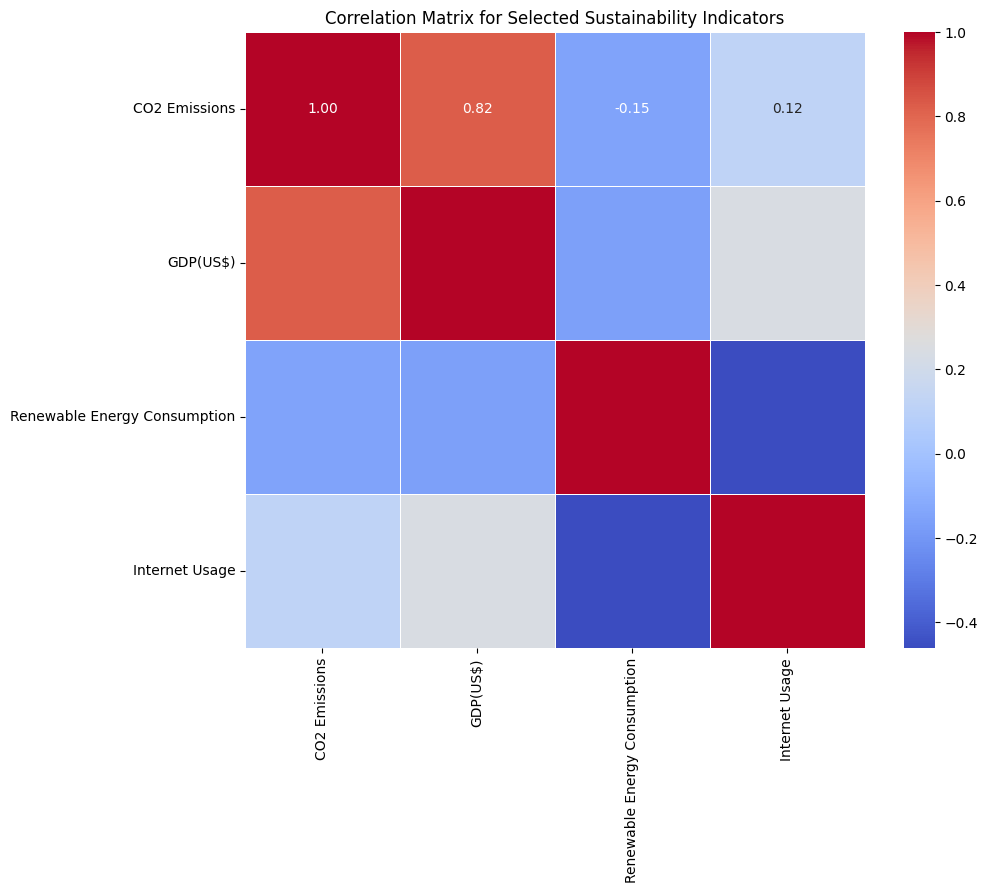

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Selecting columns
selected_columns = {
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes': 'CO2 Emissions', 
    'GDP (current US$) - NY.GDP.MKTP.CD': 'GDP(US$)',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS': 'Renewable Energy Consumption',
    'Individuals using the Internet (% of population) - IT.NET.USER.ZS': 'Internet Usage'
}

# Creating a DataFrame with only the selected columns and renaming them
df_selected = df_filtered[list(selected_columns.keys())]
df_selected.rename(columns=selected_columns, inplace=True)

# Calculating the correlation matrix for the renamed columns
correlation_matrix = df_selected.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix for Selected Sustainability Indicators')
plt.show()

Based on the heatmap of the correlation matrix, we can observe the following relationships between the variables:
While not all four variables are directly correlated with each other in a simple way, they do have relationships that reflect the complex interplay between economic development, energy consumption patterns, environmental impacts, and technological accessibility. The specific strength and direction of these correlations were indicated in the heatmap, with positive numbers indicating a direct relationship and negative numbers indicating an inverse relationship.

Question - 3

In [26]:
# Filtering the dataset for CO2 emissions data specifically for the year 2000
data_2000_CO2 = df_filtered[df_filtered['Year'] == 2000].set_index('Country Name')['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes']

# Doing the same for the year 2018 to get CO2 emissions data
data_2018_CO2 = df_filtered[df_filtered['Year'] == 2018].set_index('Country Name')['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes']

# Calculating the change in CO2 emissions from 2000 to 2018 for each country
change_in_CO2_emissions = (data_2018_CO2 - data_2000_CO2)

# Sorting the countries based on the absolute change in CO2 emissions to find the top 5 with the most significant changes
top_5_countries_change_CO2 = change_in_CO2_emissions.abs().nlargest(5)

# Printing the top 5 countries with the largest absolute change in CO2 emissions
print(top_5_countries_change_CO2)

Country Name
China                 6607.274
India                 1612.897
United States          573.188
Iran, Islamic Rep.     386.139
Indonesia              310.781
Name: Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes, dtype: float64


<Figure size 2800x2200 with 0 Axes>

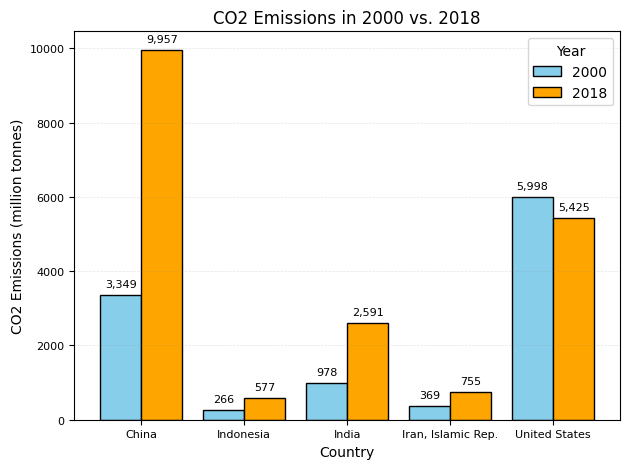

In [27]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Specifying the list of top countries based on a previous analysis
top_countries_list = ['China', "Iran, Islamic Rep.", 'Indonesia', 'United States', 'India']

# Filtering the dataset for CO2 emissions data in the years 2000 and 2018 
data_2000_CO2 = df_filtered[(df_filtered['Year'] == 2000) & (df_filtered['Country Name'].isin(top_countries_list))]
data_2018_CO2 = df_filtered[(df_filtered['Year'] == 2018) & (df_filtered['Country Name'].isin(top_countries_list))]

# Preparing the filtered data for plotting by setting the 'Country Name' as the index
data_2000_CO2 = data_2000_CO2.set_index('Country Name')['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes']
data_2018_CO2 = data_2018_CO2.set_index('Country Name')['Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes']

# Creating a new DataFrame
df_plot = pd.DataFrame({'2000': data_2000_CO2, '2018': data_2018_CO2})

# Plot
plt.figure(figsize=(28, 22))
ax = df_plot.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', width=0.8)
ax.set_title('CO2 Emissions in 2000 vs. 2018', fontsize=12)
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('CO2 Emissions (million tonnes)', fontsize=10)
plt.xticks(rotation=0, ha='center', fontsize=8)  # Adjusting x-axis labels for readability
plt.yticks(fontsize=8)  # Adjusting y-axis labels size
plt.legend(title='Year', fontsize=10, title_fontsize='10')  # Customizing legend

# Adding grid lines 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey', alpha=0.2)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=8)

plt.tight_layout()  
plt.show()  # Display


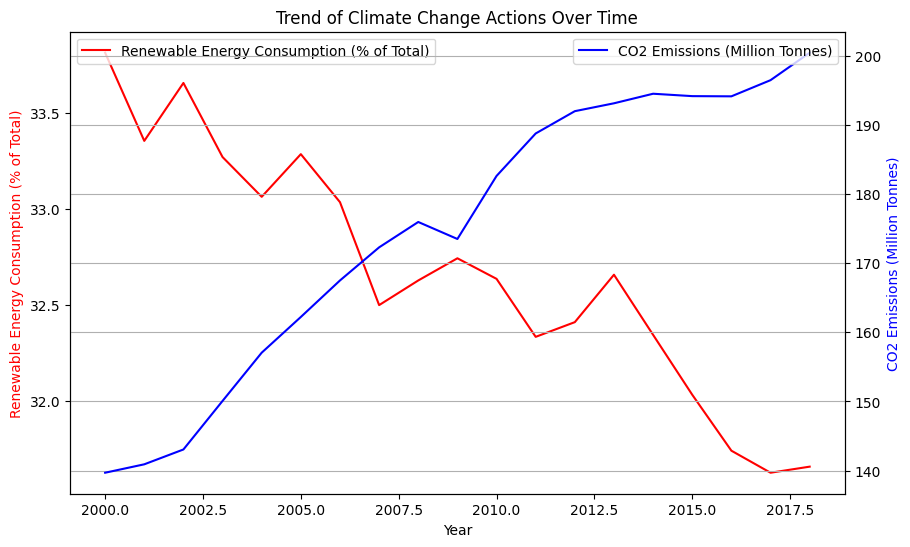

In [28]:
# Filtering the dataset for renewable energy consumption and CO2 emissions column,
df_renewable_co2 = df_filtered[[
    'Year',
    'Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS',
    'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes'
]]

# Calculating the global average for renewable energy consumption and CO2 emissions for each year
df_renewable_co2_grouped = df_renewable_co2.groupby('Year').mean().reset_index()

# Renaming columns 
df_renewable_co2_grouped.columns = ['Year', 'RenewableEnergyConsumption', 'CO2Emissions']

# Plot
plt.figure(figsize=(10, 6))

# Creating two y-axes: one for renewable energy consumption and another for CO2 emissions
ax1 = plt.gca()  # First y-axis for renewable energy consumption
ax2 = ax1.twinx()  # Second y-axis for CO2 emissions

# Plotting renewable energy consumption percentage over years on the first y-axis
ax1.plot(df_renewable_co2_grouped['Year'], df_renewable_co2_grouped['RenewableEnergyConsumption'], 'r-', label='Renewable Energy Consumption (% of Total)')
ax1.set_xlabel('Year')  # Setting the x-axis label as 'Year'
ax1.set_ylabel('Renewable Energy Consumption (% of Total)', color='r')  # Setting the y-axis label for renewable energy consumption

# Plotting CO2 emissions over years on the second y-axis
ax2.plot(df_renewable_co2_grouped['Year'], df_renewable_co2_grouped['CO2Emissions'], 'b-', label='CO2 Emissions (Million Tonnes)')
ax2.set_ylabel('CO2 Emissions (Million Tonnes)', color='b')  # Setting the y-axis label for CO2 emissions

# Adding title, legend and grid lines
plt.title('Trend of Climate Change Actions Over Time')  
ax1.legend(loc='upper left') 
ax2.legend(loc='upper right') 
plt.grid(True)

# Display
plt.show()

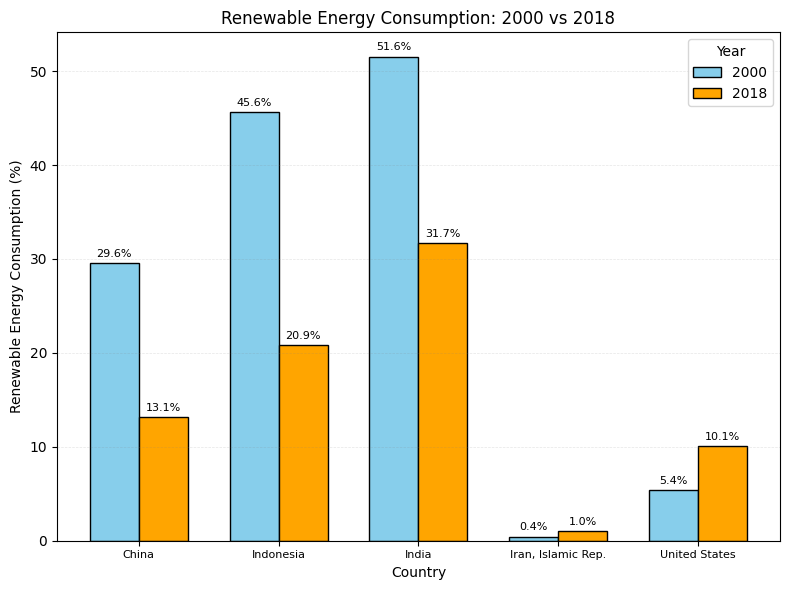

In [29]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt

# List of countries to focus on for the comparison
top_countries_list = ['China', 'Indonesia', 'India',"Iran, Islamic Rep.", 'United States']

# Filter the dataset for the year 2000 and 2018
data_2000 = df_filtered[df_filtered['Year'] == 2000].set_index('Country Name')['Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'].reindex(top_countries_list)
data_2018 = df_filtered[df_filtered['Year'] == 2018].set_index('Country Name')['Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS'].reindex(top_countries_list)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

indices = range(len(top_countries_list))
bar_width = 0.35  # Width of the bars

# Plot bars for renewable energy consumption in 2000 and 2018 side by side for comparison
bar_2000 = ax.bar([i - bar_width/2 for i in indices], data_2000, bar_width, label='2000', color='skyblue', edgecolor='black')
bar_2018 = ax.bar([i + bar_width/2 for i in indices], data_2018, bar_width, label='2018', color='orange', edgecolor='black')

# Add labels, title and legend
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Renewable Energy Consumption (%)', fontsize=10)
ax.set_title('Renewable Energy Consumption: 2000 vs 2018', fontsize=12)
ax.set_xticks(indices) 
ax.set_xticklabels(top_countries_list, rotation=0, ha='center', fontsize=8)  
ax.legend(title='Year', fontsize=10, title_fontsize='10') 

# Function to add value labels above each bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',  # Formating the label with one decimal place
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the label at the top center of the bar
                    xytext=(0, 3),  # Slightly offset the label above the bar
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Bar labeling
add_value_labels(bar_2000)
add_value_labels(bar_2018)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey', alpha=0.2)

plt.tight_layout()

# Display 
plt.show()